Visualization using basic graphics

In [1]:
library(MASS)
data(survey)
new <- na.omit(survey)
head(new)

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000
7,Male,17.7,17.7,Right,L on R,83,Right,Freq,Never,182.88,Imperial,18.833
8,Female,17.0,17.3,Right,R on L,74,Right,Freq,Never,157.00,Metric,35.833


1)Plot a bar graph for the number of male and female participants in the survey.
Provide the title as “Male and Female participants”, y-axis label as “frequency” and specify the colours for the bars.


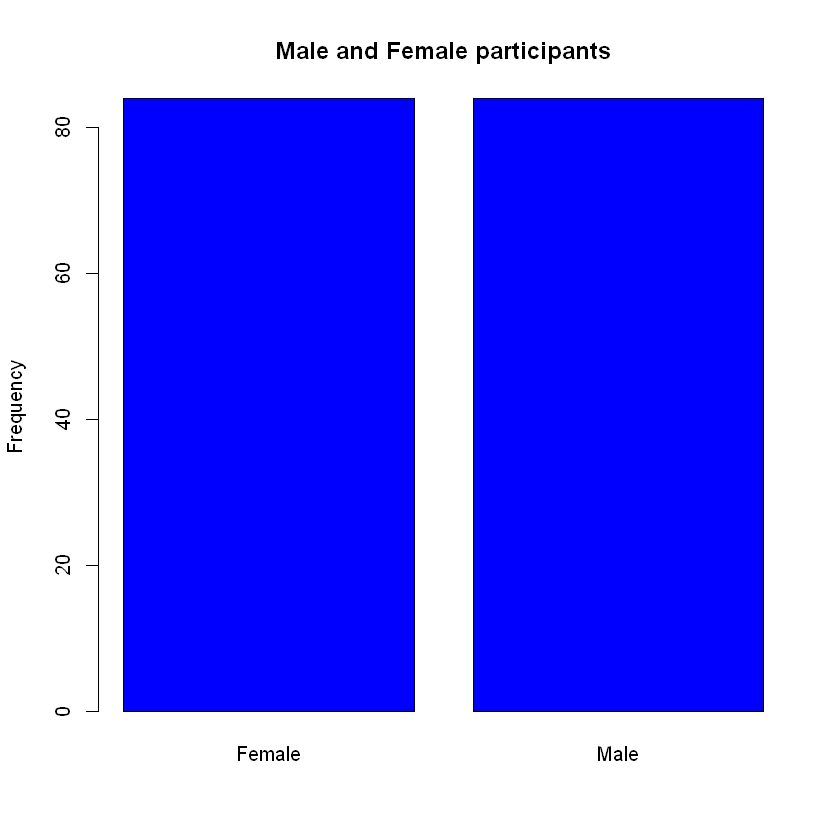

In [2]:
barplot(table(new$Sex),main='Male and Female participants', ylab ='Frequency',col='blue')

2)Plot a bar graph for the number of left handers and right handers in the survey. Provide the title as “Left Handers and Right Handers”, y-axis label as “count” and specify the colours for the bars.


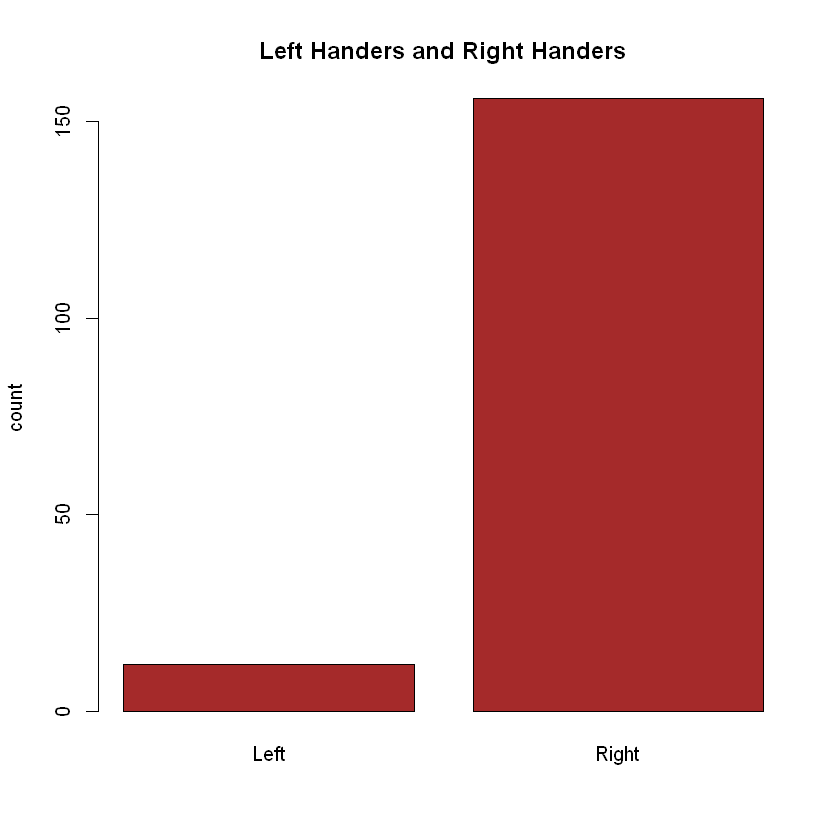

In [3]:
barplot(table(new$W.Hnd),main='Left Handers and Right Handers', ylab ='count',col='brown')

In [4]:
library(dplyr)


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



3)Plot the distribution between male left handers and female left handers using bar chart. Provide the title as “Female Left Handers and Male Left Handers" , y-axis label as “count” 

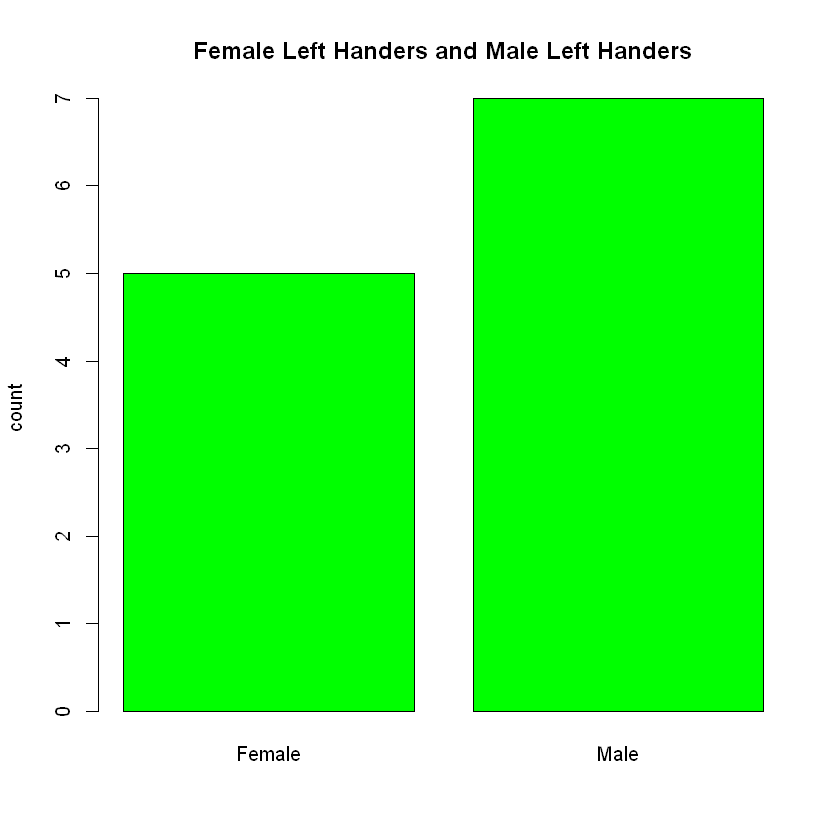

In [5]:
dis<-(new %>%
      filter(W.Hnd=='Left')%>%
      group_by(W.Hnd))
barplot(table(dis$Sex),main='Female Left Handers and Male Left Handers', ylab ='count',col='green')

4)Draw the distribution of smoking habits of male left handers using pie chart.

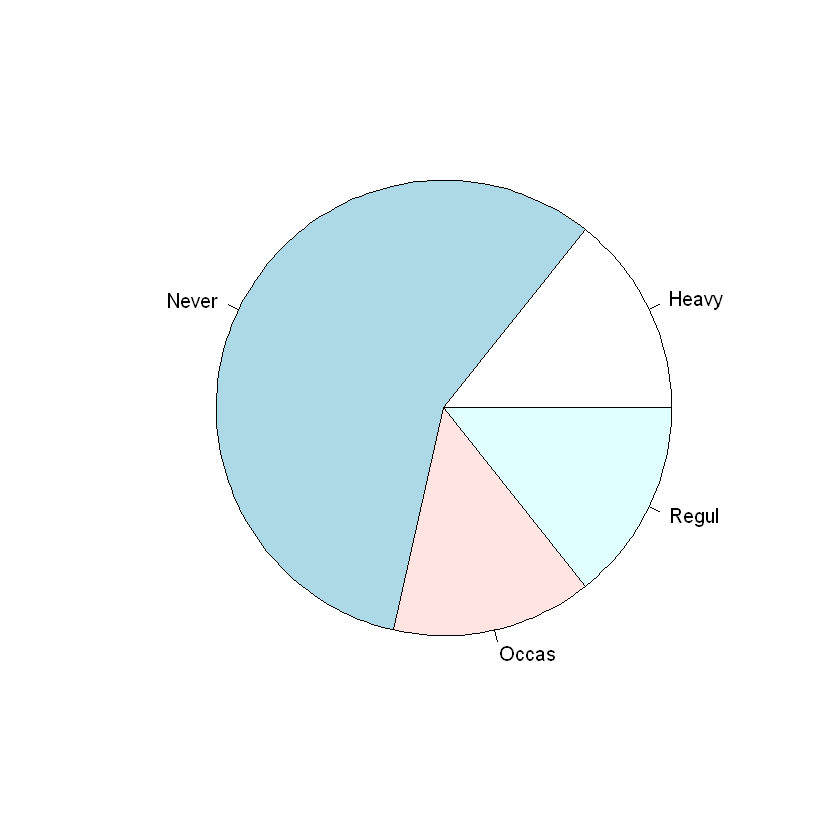

In [6]:
dis1<-(new%>%
      filter(Sex=='Male',W.Hnd=='Left')%>%
      group_by(Sex,W.Hnd))
pie(table(dis1$Smoke))

5)Draw the histogram of age distribution with the title as ‘Age distribution’ and xlabel as ‘Age range’ and ylabel as ‘frequency’.

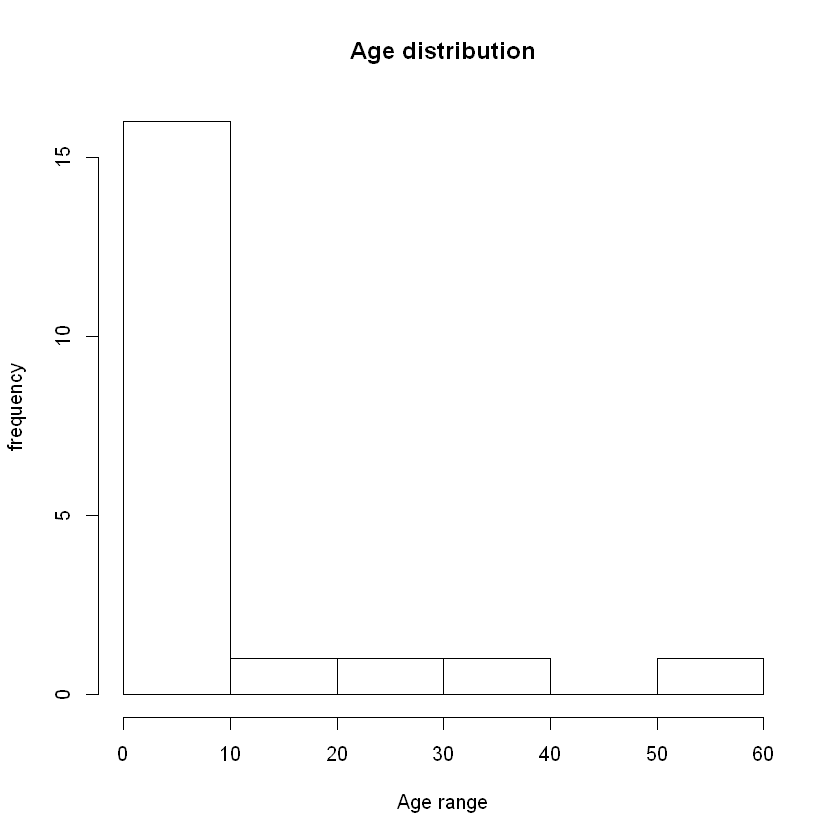

In [7]:
hist(table(round(new$Age)),main='Age distribution',xlab = 'Age range',ylab='frequency')

6)Reveal the relationship between the age and writing hand span using scatter plot.

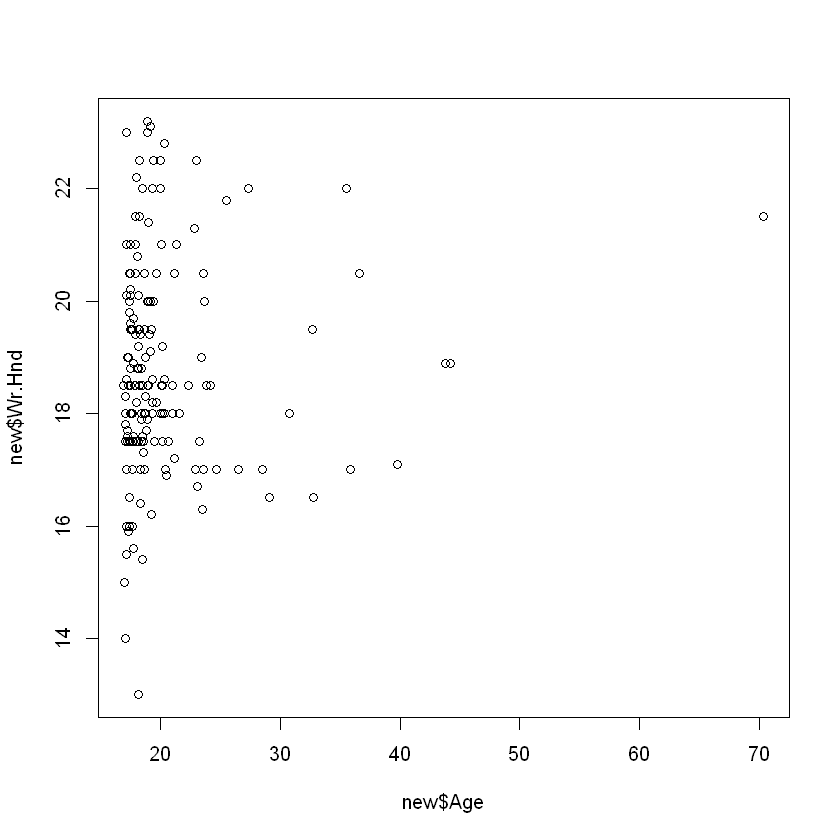

In [8]:
plot(new$Age,new$Wr.Hnd)

7)Draw the boxplot for pulse rate to analyse the five summary statistics. Provide appropriate title and label.

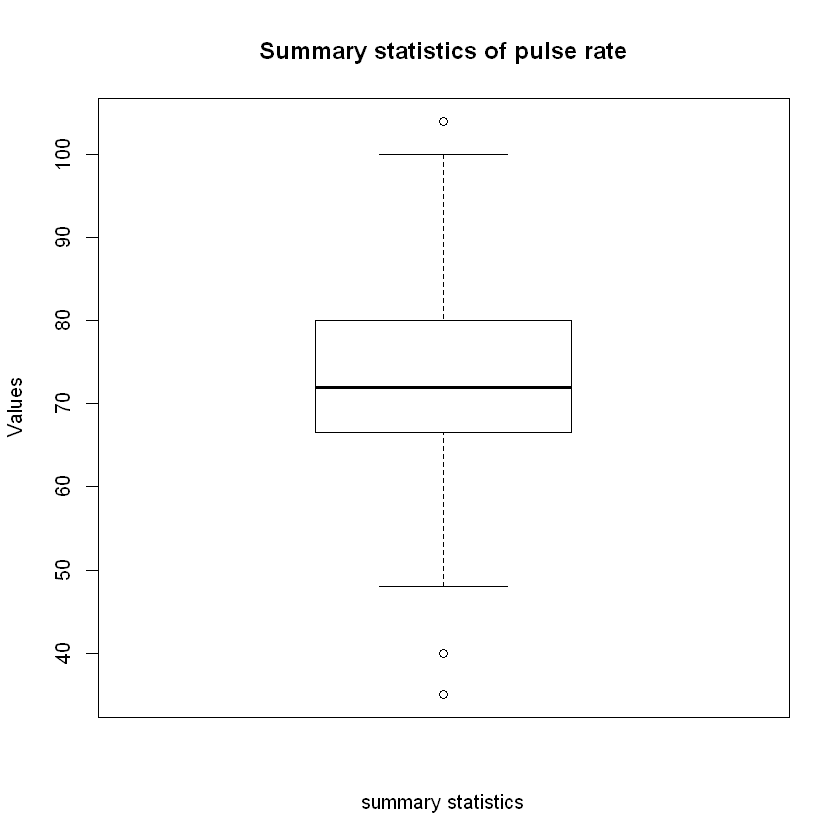

In [9]:
boxplot(new$Pulse,main='Summary statistics of pulse rate',xlab='summary statistics',ylab="Values")

Visualization using grammar of graphics

In [10]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


1) Plot a bar graph for the number of male and female participants in the survey. Provide the title as “Male and Female participants” and specify the colours for the bars.

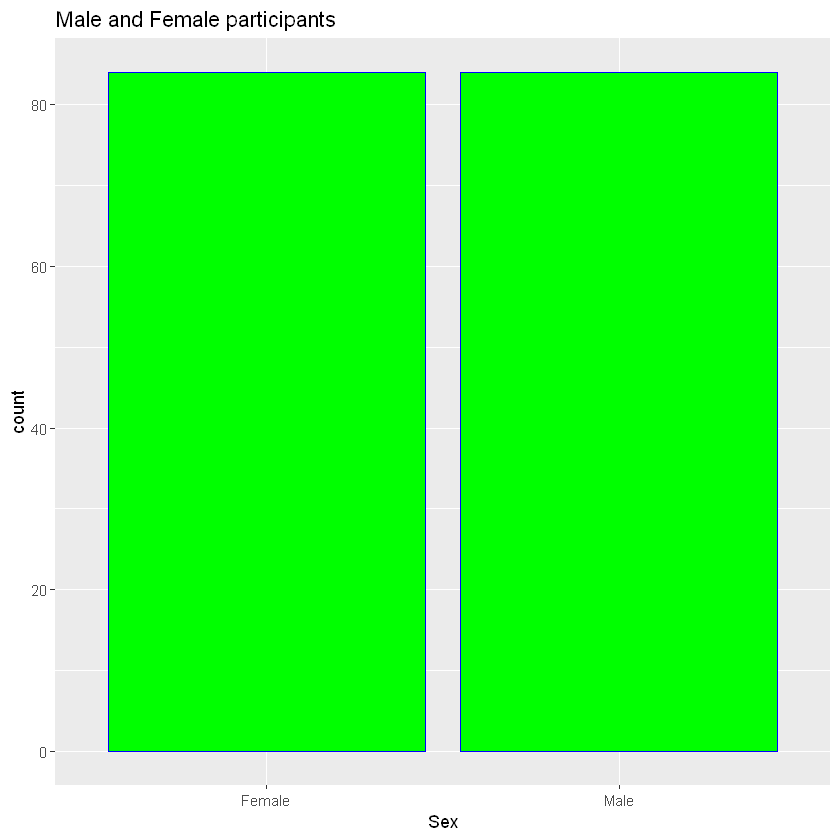

In [12]:
ggplot(new,aes(x=Sex))+geom_bar(color='blue',fill='green')+labs(title='Male and Female participants')

2) Plot a bar graph for the number of left handers and right handers in the survey. Provide the title as “Left Handers and Right Handers” and specify the colours for the bars.

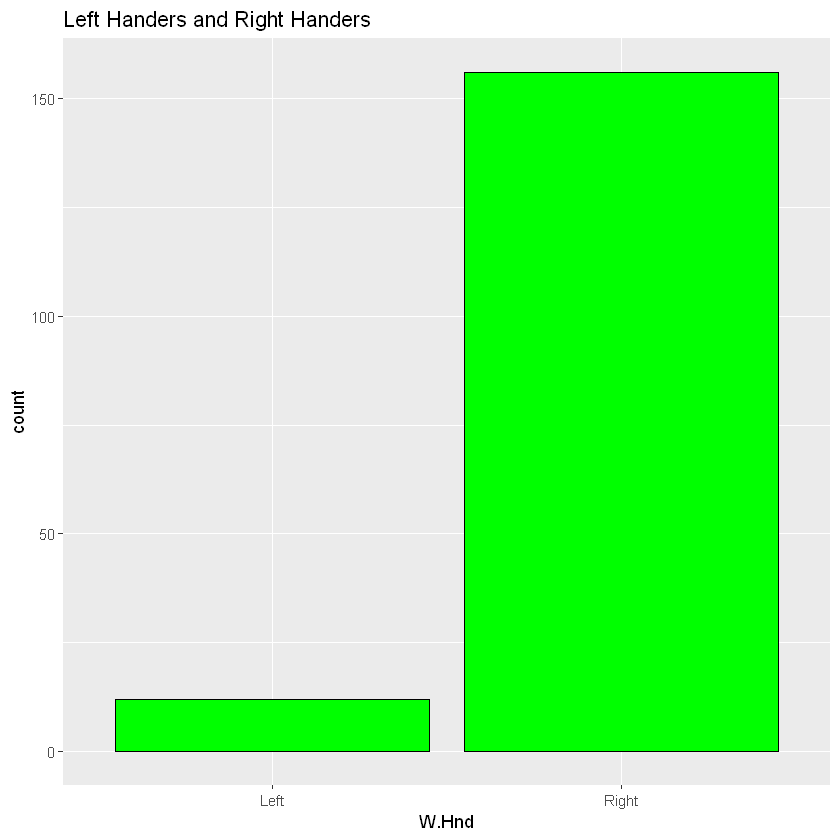

In [13]:
ggplot(new,aes(x=W.Hnd))+geom_bar(color='black',fill='green')+labs(title='Left Handers and Right Handers')

3)Plot the distribution between male left handers and female left handers using bar chart. Provide the title as “Female Left Handers and Male Left Handers” and specify the colour

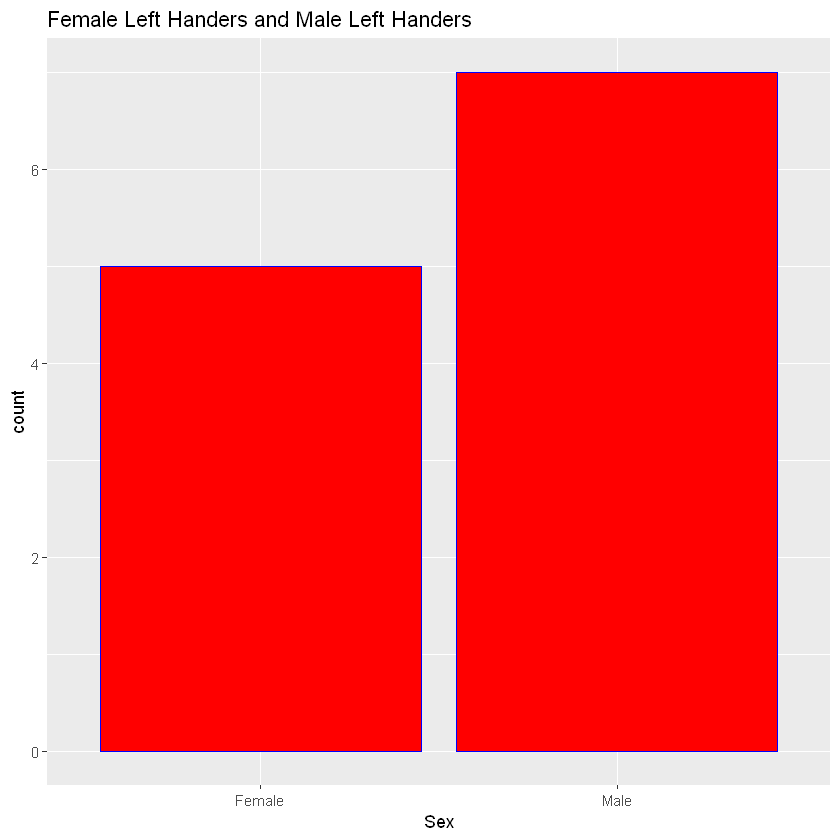

In [15]:
dis3<-(new%>%
      filter(W.Hnd=='Left')%>%
      group_by(W.Hnd))

ggplot(dis3,aes(x=Sex))+geom_bar(color='blue',fill='red')+labs(title='Female Left Handers and Male Left Handers')

4)Draw the distribution of smoking habits of male left handers based on age using pie chart.

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.


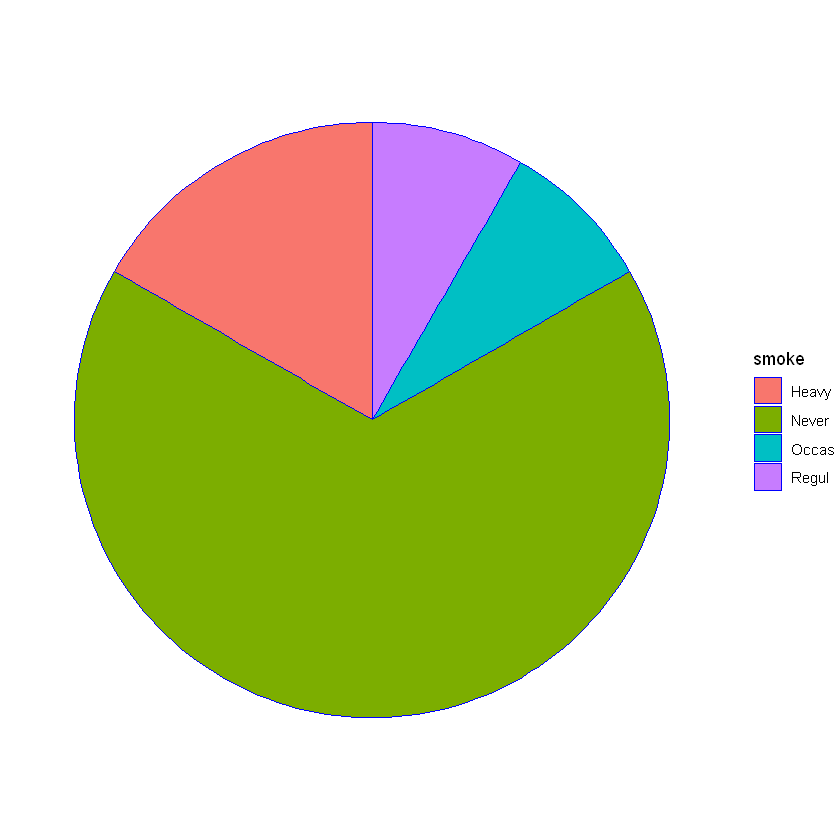

In [26]:
dis4<-(new%>%
      filter(Sex=='Male',W.Hnd=='Left')%>%
      group_by(Sex,W.Hnd))
freq<-table(res$Smoke)
smoke<-unique(dis4$Smoke)
#smoke
df<-data.frame(freq,smoke)
#df
ggplot(df, aes(x="", y=freq, fill=smoke)) +
  geom_bar(stat="identity", width=1, color="blue") +
  coord_polar("y", start=0) +
  
  theme_void()

5)Draw the histogram of age distribution with the title as ‘Age distribution’ and xlabel as ‘Age range’ and ylabel as ‘frequency’

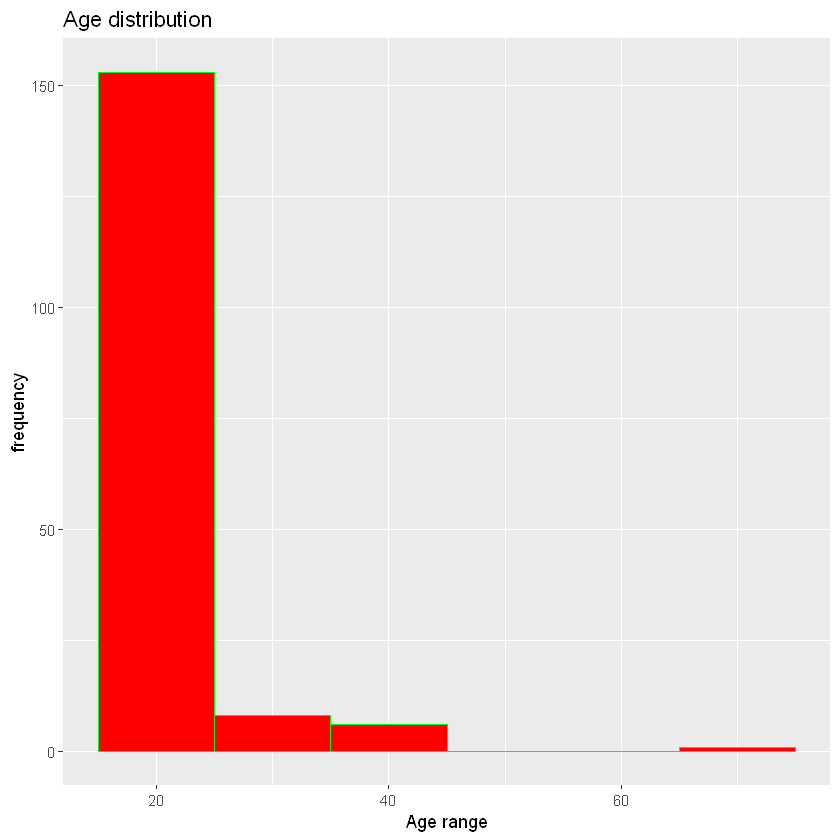

In [18]:
ggplot(new,aes(x=Age))+geom_histogram(binwidth = 10,color='green',fill='red')+labs(title='Age distribution',x='Age range',y='frequency')

6)Reveal the relationship between the age and writing hand span using scatter plot.

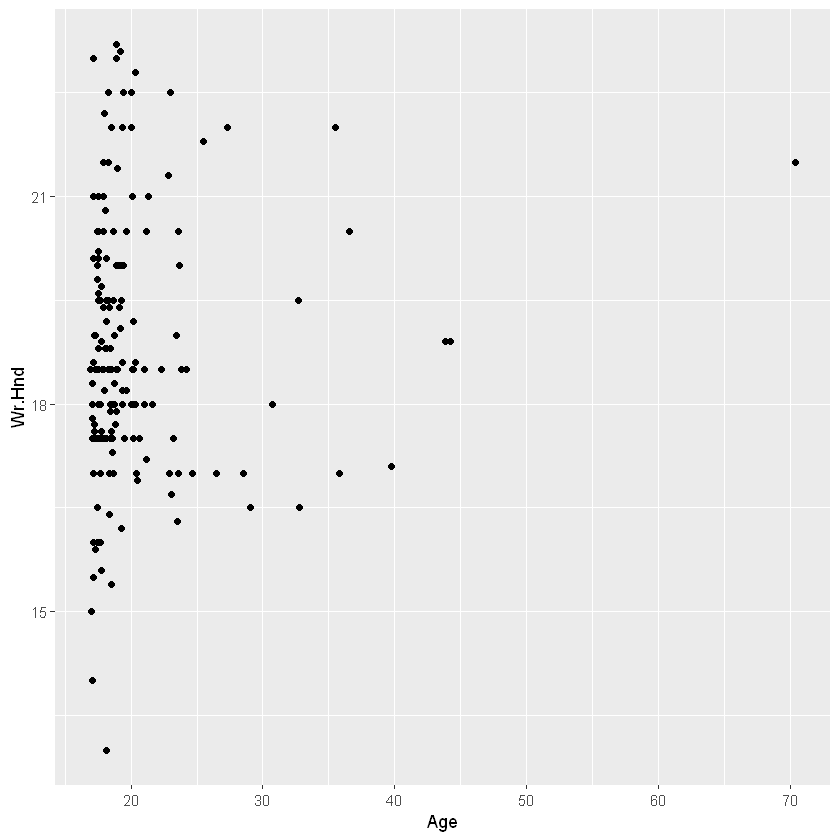

In [19]:
ggplot(data = new,mapping = aes(x=Age,y=Wr.Hnd))+geom_point()

7)Plot the distribution of writing hand span vs. pulse rate of left handers. Provide colour based on gender and vary the size of the point based on height of the student.


[1] 177.80 182.88 200.00 193.04 171.00 180.00 160.02 172.00 170.00 165.00
[11] 163.00

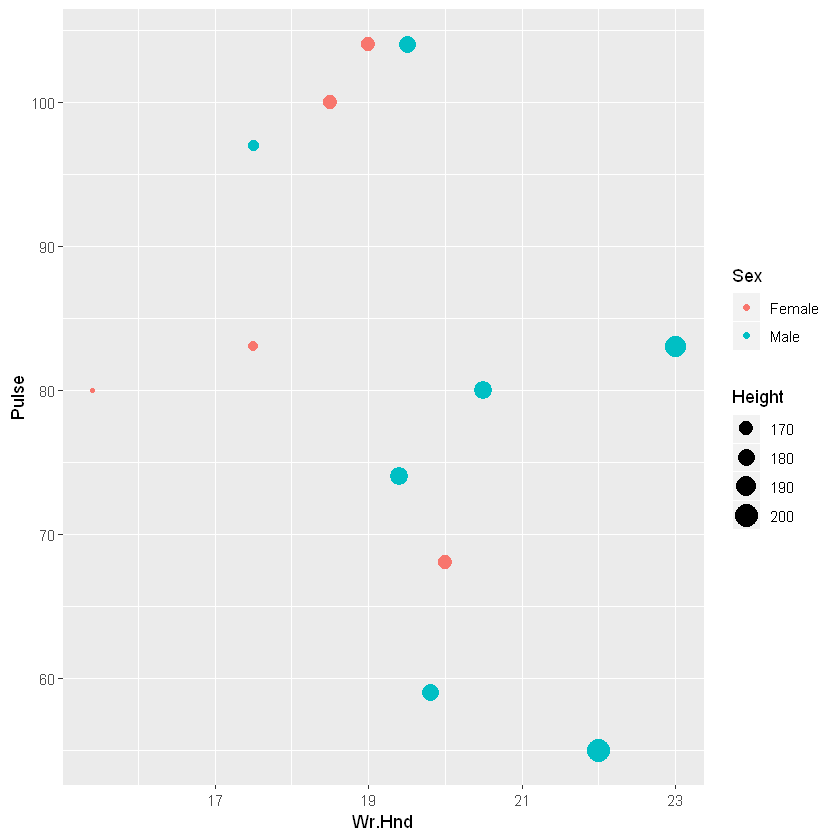

In [20]:
res<-(new %>%
      filter(W.Hnd=='Left')%>%
      group_by(W.Hnd))
unique(res$Height)
ggplot(res,aes(Wr.Hnd,Pulse,size=Height,color=Sex))+geom_point()

8)Plot the distribution of height of the students with filled colour based on gender with facet based on left and write handers.

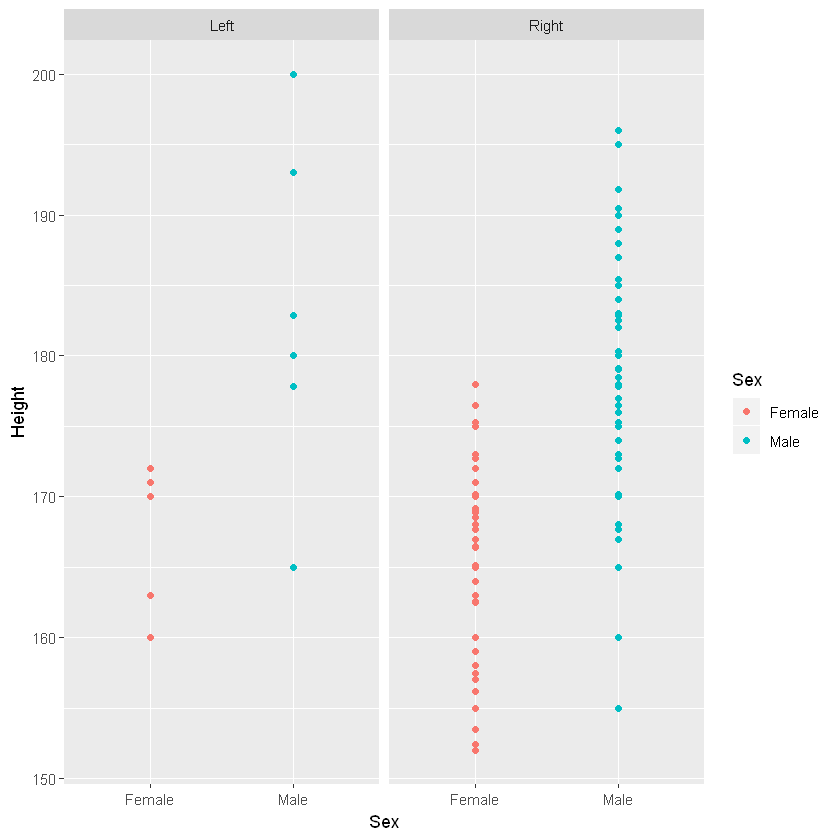

In [22]:
ggplot(data = new, mapping = aes(x = Sex, y = Height, color = Sex)) +
  geom_point() +
  facet_wrap(facets =  vars(W.Hnd))

9)Plot the trend of span of writing hand vs. non-writing hand coloured and grouped based on left and right handers with facet label based on clap.

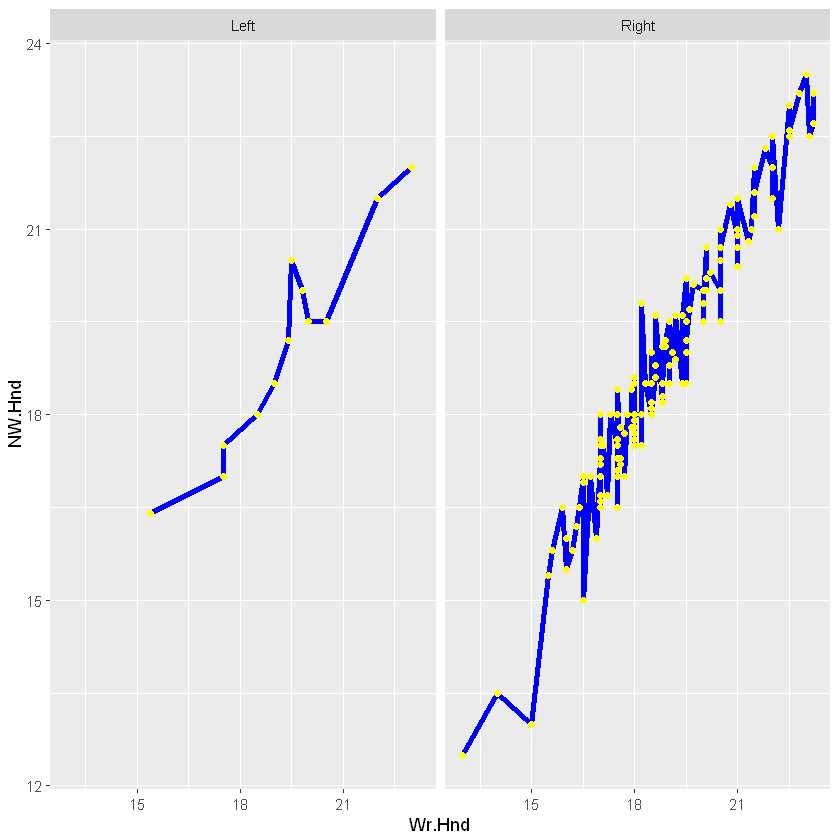

In [23]:
ggplot(data = new, mapping = aes(x = Wr.Hnd, y = NW.Hnd)) +
 geom_line(size=1.5,color='blue')+geom_point(size=1.5,color='yellow')+
  facet_wrap(facets =  vars(W.Hnd))

10)Plot the distribution of age of students based on categories under exercise with facet wrap based on gender.

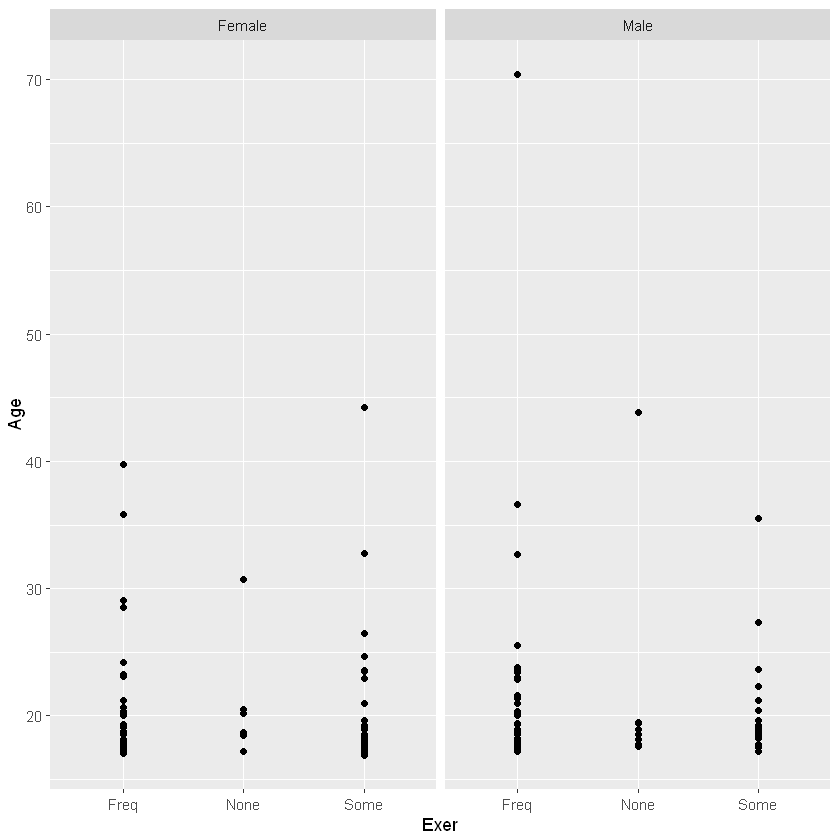

In [24]:
ggplot(data = new, mapping = aes(x = Exer, y = Age)) +
  geom_point(size=1.5,color='black') +
  facet_wrap(facets =  vars(Sex))

11)Plot the box plot of writing hand span with respect to smoking habits of students.

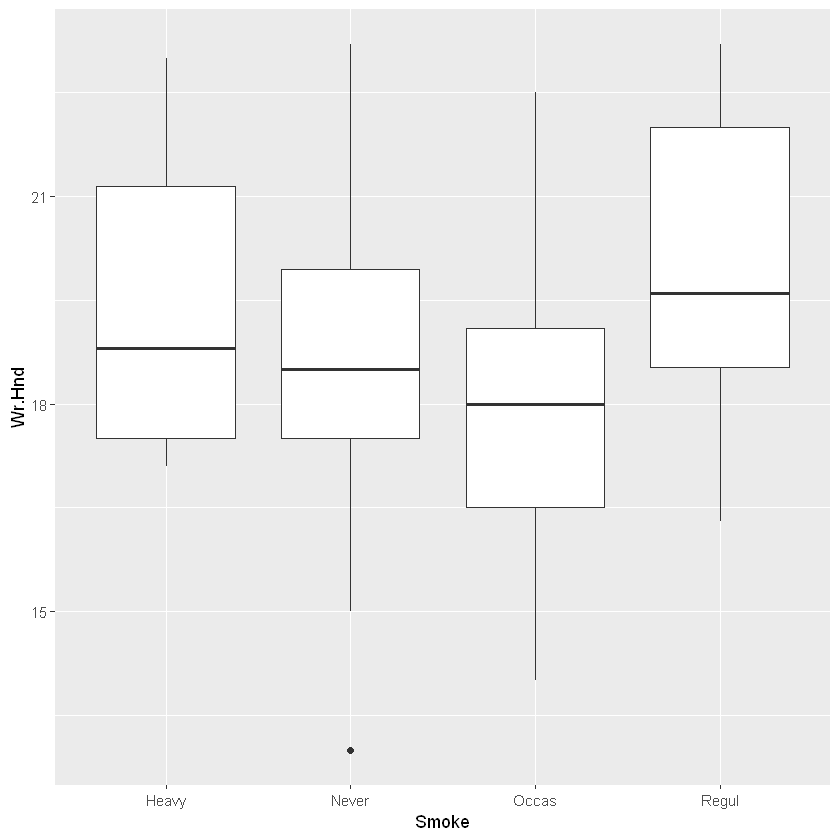

In [25]:
ggplot(new,aes(x=Smoke,y=Wr.Hnd))+geom_boxplot()